# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

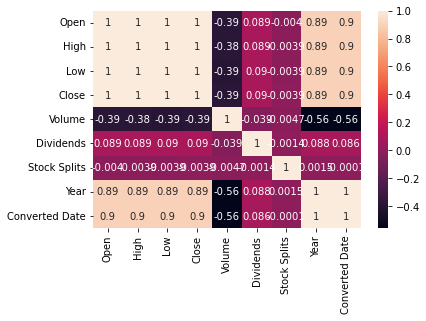

In [4]:
sb.heatmap(stocks_df.corr(),annot=True)
plt.show()

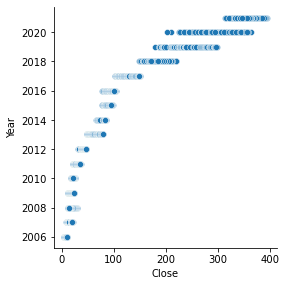

In [6]:
sb.pairplot(stocks_df, x_vars=['Close'], 
             y_vars=['Year'], height=4, aspect=1, kind='scatter')
plt.show()


## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [9]:
x=stocks_df['Year']
y=stocks_df['Close']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x=stocks_df['Year']
y=stocks_df['Close']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)
x_train



2457    2016
1540    2012
384     2007
2560    2016
3320    2019
        ... 
1930    2014
79      2006
1859    2013
2840    2017
1544    2012
Name: Year, Length: 2710, dtype: int64

In [18]:
y_train

2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
           ...    
1930     72.464973
79        6.057884
1859     65.574173
2840    129.896942
1544     40.199707
Name: Close, Length: 2710, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [19]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const   -43206.067012
Year        21.509716
dtype: float64

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:50:38   Log-Likelihood:                -14320.
No. Observations:                2710   AIC:                         2.864e+04
Df Residuals:                    2708   BIC:                         2.866e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.321e+04    412.198   -104.819      0.000    -4.4e+04   -4.24e+04
Year          21.5097      0.205    105.079      0.000      21.108      21.911
==============================================================================
Omnibus:                      293.277   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.310
Skew:                           0.511   Prob(JB):                     1.57e-40
Kurtosis:                       2.240   Cond. No.                     9.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

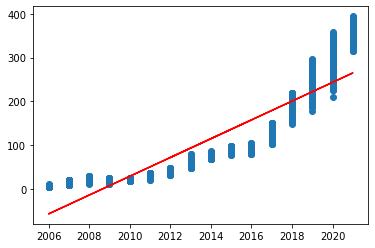

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -43206.067012
 + 21.509716*x_train, 'r')
plt.show()


## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [23]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)


Now plot the residuals. Did you get a bell curve?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


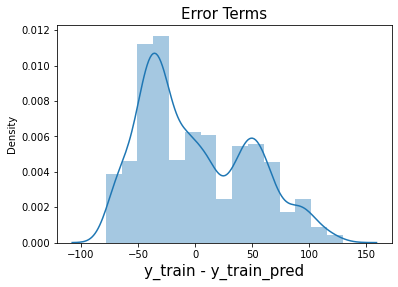

In [26]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 